In [9]:
import pandas as pd
import glob


In [10]:
file_paths = glob.glob("Datos_SIATA/Estacion_meteorologica*.csv")
df = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

   codigo           fecha_hora     h     t     pr   vv  vv_max    dv  dv_max  \
,0     105  2014-01-16 00:00:29  86.2  18.2  826.0  2.8     3.8  10.0   358.0   
,1     105  2014-01-16 00:01:29  86.3  18.2  826.0  2.2     3.5  14.0   358.0   
,2     105  2014-01-16 00:02:29  86.6  18.1  826.0  2.3     3.4   8.0   359.0   
,3     105  2014-01-16 00:03:29  86.8  18.1  826.0  3.2     4.3  12.0   355.0   
,4     105  2014-01-16 00:04:29  86.9  18.1  826.0  2.3     3.2  16.0   353.0   
,
,     p  calidad  
,0  0.0        1  
,1  0.0        1  
,2  0.0        1  
,3  0.0        1  
,4  0.0        1  


In [11]:
df.shape

(51676688, 11)

In [12]:
df.head()

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
0,105,2014-01-16 00:00:29,86.2,18.2,826.0,2.8,3.8,10.0,358.0,0.0,1
1,105,2014-01-16 00:01:29,86.3,18.2,826.0,2.2,3.5,14.0,358.0,0.0,1
2,105,2014-01-16 00:02:29,86.6,18.1,826.0,2.3,3.4,8.0,359.0,0.0,1
3,105,2014-01-16 00:03:29,86.8,18.1,826.0,3.2,4.3,12.0,355.0,0.0,1
4,105,2014-01-16 00:04:29,86.9,18.1,826.0,2.3,3.2,16.0,353.0,0.0,1


In [17]:
df.describe()

,codigo,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
count,5.167669e+07,5.167662e+07,5.167662e+07,5.167662e+07,5.167666e+07,5.167666e+07,5.167522e+07,5.167522e+07,5.167658e+07,5.167669e+07
mean,2.111723e+02,6.766793e+01,1.398702e+01,7.741759e+02,-4.741392e+00,-1.691638e+01,1.334231e+02,1.442507e+02,-6.405785e+00,6.120848e+03
std,1.119051e+02,8.728717e+01,8.154567e+01,2.548451e+02,7.990608e+01,1.385127e+02,1.384723e+02,2.046276e+02,7.976137e+01,8.243474e+04
min,7.300000e+01,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.000000e+00
25%,1.050000e+02,6.306000e+01,1.795000e+01,8.226000e+02,7.000000e-01,1.200000e+00,5.400000e+01,5.900000e+01,0.000000e+00,1.000000e+00
50%,2.060000e+02,7.840000e+01,2.000000e+01,8.375100e+02,1.300000e+00,2.100000e+00,1.150000e+02,1.520000e+02,0.000000e+00,1.000000e+00
75%,2.520000e+02,8.720000e+01,2.300000e+01,8.528000e+02,2.300000e+00,3.500000e+00,2.170000e+02,2.650000e+02,0.000000e+00,1.000000e+00
max,6.150000e+02,3.792000e+02,2.292310e+04,8.659830e+04,1.146900e+02,1.208000e+02,9.940000e+02,3.570020e+05,8.700000e+01,1.514627e+07


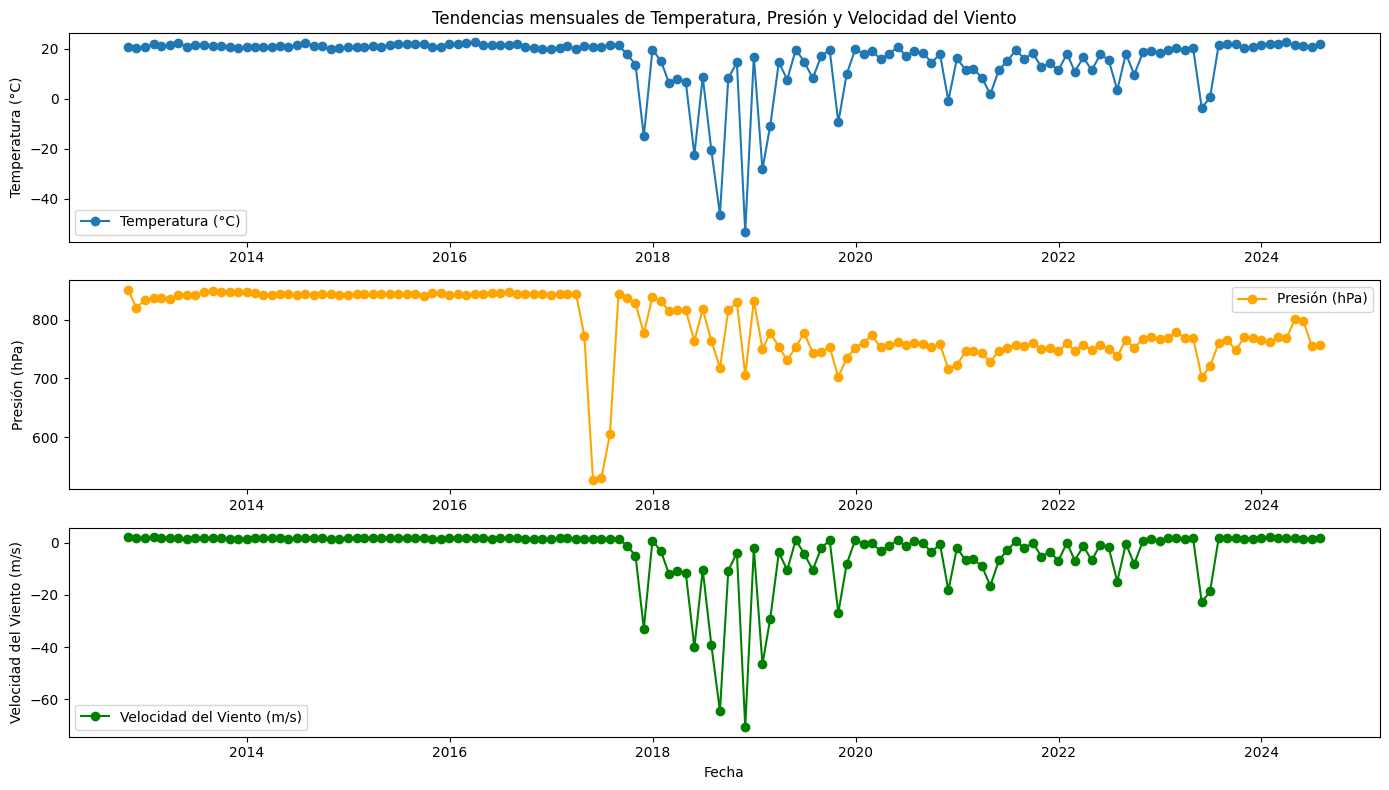

In [21]:
import matplotlib.pyplot as plt

df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

monthly_summary = df.resample('M', on='fecha_hora').mean()

plt.figure(figsize=(14, 8))

# Gráfica de la temperatura
plt.subplot(3, 1, 1)
plt.plot(monthly_summary.index, monthly_summary['t'], label='Temperatura (°C)', marker='o')
plt.title('Tendencias mensuales de Temperatura, Presión y Velocidad del Viento')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Gráfica de la presión
plt.subplot(3, 1, 2)
plt.plot(monthly_summary.index, monthly_summary['pr'], label='Presión (hPa)', marker='o', color='orange')
plt.ylabel('Presión (hPa)')
plt.legend()

# Gráfica de la velocidad del viento
plt.subplot(3, 1, 3)
plt.plot(monthly_summary.index, monthly_summary['vv'], label='Velocidad del Viento (m/s)', marker='o', color='green')
plt.ylabel('Velocidad del Viento (m/s)')
plt.xlabel('Fecha')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
Q1 = df[['t', 'pr', 'vv']].quantile(0.25)
Q3 = df[['t', 'pr', 'vv']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['t', 'pr', 'vv']] < (Q1 - 1.5 * IQR)) | (df[['t', 'pr', 'vv']] > (Q3 + 1.5 * IQR)))
print("Outliers por columna:\n", outliers.sum())

Outliers por columna:
, t      416471
,pr    5946669
,vv    2337178
,dtype: int64


In [24]:
total_data = len(df)
outliers_count = outliers.sum()
outliers_percentage = (outliers_count / total_data) * 100

outliers_percentage

t      0.805917
pr    11.507450
vv     4.522693
dtype: float64

In [31]:
## Que tan frecuente es la temperatura
# Outlier mayor
high_temp_threshold = df['t'].mean()
high_temp_count = (df['t']>high_temp_threshold).sum() 
(high_temp_count/total_data)*100 # El 96% de los casos existen temperaturas altas

96.03525674865232

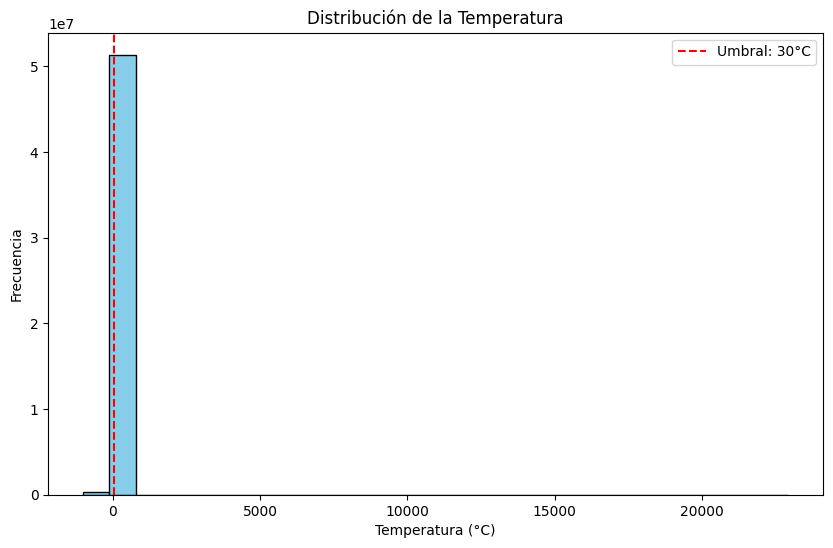

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['t'], bins=27, color='skyblue', edgecolor='black')
plt.axvline(high_temp_threshold, color='red', linestyle='--', label=f'Umbral: {high_temp_threshold}°C')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Temperatura')
plt.legend()
plt.show()

In [34]:
# Definir los umbrales
high_temp_threshold = 30         # Temperatura alta (°C)
low_pressure_threshold = 1000    # Presión baja (hPa)
high_wind_speed_threshold = 10   # Velocidad del viento alta (m/s)

# Calcular los eventos
total_data = len(df)
high_temp = df['t'] > high_temp_threshold
low_pressure = df['pr'] < low_pressure_threshold
high_wind_speed = df['vv'] > high_wind_speed_threshold

# Probabilidades individuales
prob_high_temp = high_temp.sum() / total_data
prob_low_pressure = low_pressure.sum() / total_data
prob_high_wind_speed = high_wind_speed.sum() / total_data

# Probabilidad conjunta: P(T alta ∩ P baja)
joint_high_temp_and_low_pressure = (high_temp & low_pressure).sum() / total_data

# Probabilidad condicional: P(T alta | P baja)
if prob_low_pressure > 0:
    prob_high_temp_given_low_pressure = joint_high_temp_and_low_pressure / prob_low_pressure
else:
    prob_high_temp_given_low_pressure = None

# Mostrar resultados
print(f"Probabilidad de temperatura alta (T alta): {prob_high_temp:.2f}")
print(f"Probabilidad de presión baja (P baja): {prob_low_pressure:.2f}")
print(f"Probabilidad conjunta de T alta y P baja: {joint_high_temp_and_low_pressure:.2f}")
print(f"Probabilidad de T alta dado P baja: {prob_high_temp_given_low_pressure:.2f}" if prob_high_temp_given_low_pressure else "No hay datos suficientes para calcular la probabilidad condicional")


Probabilidad de temperatura alta (T alta): 0.00
,Probabilidad de presión baja (P baja): 1.00
,Probabilidad conjunta de T alta y P baja: 0.00
,Probabilidad de T alta dado P baja: 0.00
